In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# !pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
# !pip install pingouin
import pingouin as pg

In [2]:
df_train = pd.read_csv('D:/Data/EFA_AirLine/train.csv')
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df_test = pd.read_csv('D:/Data/EFA_AirLine/test.csv')
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


### Excluding other than value types

In [4]:
df_train = df_train.select_dtypes(exclude=(object,bool))

In [5]:
df_test = df_test.select_dtypes(exclude=(object,bool))

In [6]:
df_train.values.shape

(103904, 20)

In [13]:
df_train.dropna()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [14]:
df_train.values.shape

(103904, 20)

In [18]:
df_train.astype('float64')

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,70172.0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,1.0,5047.0,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0
2,2.0,110028.0,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,3.0,24026.0,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0
4,4.0,119299.0,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899.0,94171.0,23.0,192.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,0.0
103900,103900.0,73097.0,49.0,2347.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0
103901,103901.0,68825.0,30.0,1995.0,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,7.0,14.0
103902,103902.0,54173.0,22.0,1000.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,5.0,1.0,5.0,4.0,1.0,0.0,0.0


In [24]:
df_train.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3
103900,103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0
103901,103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7
103902,103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0


In [17]:
df_test.shape

(25976, 20)

In [15]:
df_test.dropna()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,1,90035,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,2,12360,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,3,77959,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,4,36875,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,25972,71167,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,25973,37675,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,25974,90086,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [16]:
df_test.shape

(25976, 20)

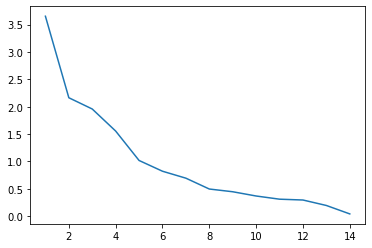

In [25]:
x =df_train[df_train.columns[6:20]] 
fa = FactorAnalyzer()
fa.fit(x, 10)
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [26]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 0.08463843  0.07019901 -0.00519217]
 [ 0.0130546  -0.00216277  0.00516594]
 [ 0.75108866  0.01304493 -0.03611682]
 [ 0.39689152  0.1382382  -0.02121159]
 [ 0.79403491  0.08795983 -0.03309839]
 [ 0.73741702  0.46816516 -0.02643417]
 [ 0.08926146  0.70172573 -0.02357833]
 [ 0.07484452  0.4882035   0.02087971]
 [ 0.01965139  0.76443224  0.00446773]
 [ 0.14509578  0.28611241 -0.0168715 ]
 [ 0.01212926  0.79795215 -0.04554632]
 [ 0.85740304  0.09132531 -0.01914087]
 [ 0.00675261 -0.01326755  0.97044409]
 [ 0.00517535 -0.01752267  0.98921192]]


In [27]:
factor1 = df_train[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df_train[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df_train[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]

In [28]:
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.87628779166241, array([0.875, 0.878])) (0.7942916933090223, array([0.792, 0.796])) (0.7679754211110685, array([0.766, 0.77 ]))
